 # Predict delivery time using sorting time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import sklearn 
from sklearn import preprocessing as per
import scipy
import scipy.stats as stats


In [2]:
df=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\assignment 4\\delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.shape

(21, 2)

In [7]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
df.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'sortingtime'}, inplace=True)


In [12]:
df.columns

Index(['DeliveryTime', 'sortingtime'], dtype='object')

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

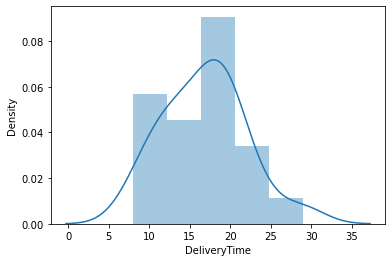

In [13]:
sns.distplot(df['DeliveryTime'])

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

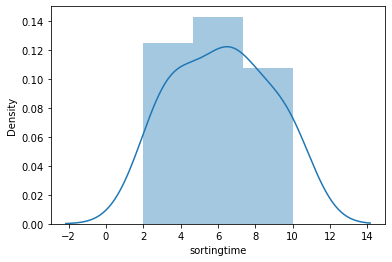

In [14]:
sns.distplot(df['sortingtime'])

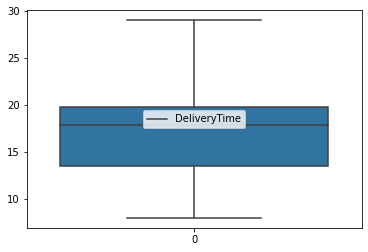

In [15]:
sns.boxplot(data=[df['DeliveryTime']])
plt.legend(['DeliveryTime'])

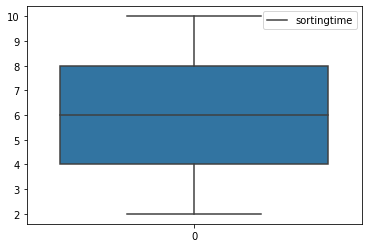

In [16]:
sns.boxplot(data=[df['sortingtime']])
plt.legend(['sortingtime'])

In [17]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()


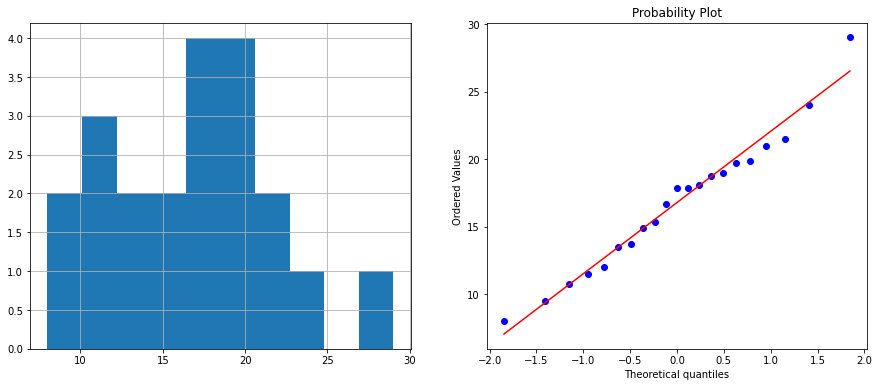

In [18]:
diagnostic_plots(df, 'DeliveryTime')


In [19]:
#transforming data with log function 

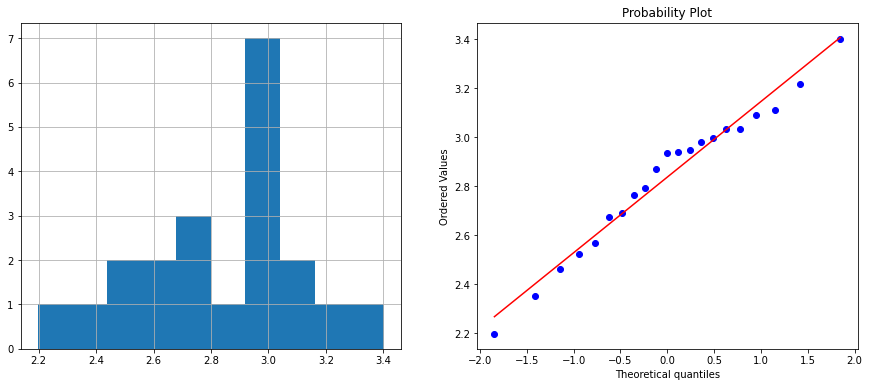

In [20]:
df['DeliveryTime']=np.log(df['DeliveryTime']+1)
diagnostic_plots(df,'DeliveryTime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

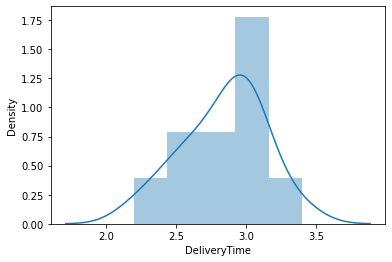

In [21]:
sns.distplot(df['DeliveryTime'])

In [22]:
#exponentional transformation


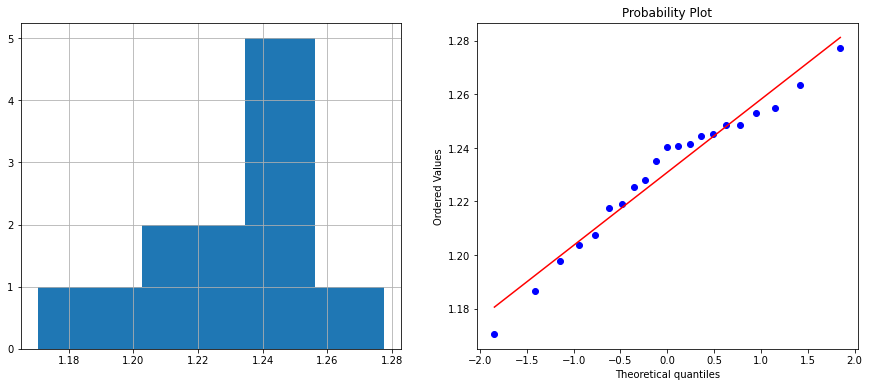

In [23]:
df['DeliveryTime']=df['DeliveryTime']**(1/5)
diagnostic_plots(df,'DeliveryTime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

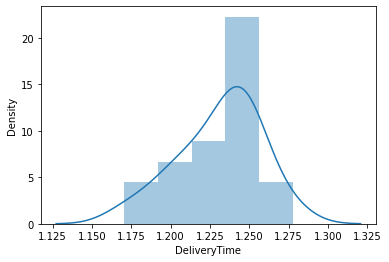

In [24]:
sns.distplot(df['DeliveryTime'])

In [25]:
# resiprocal trasformation 

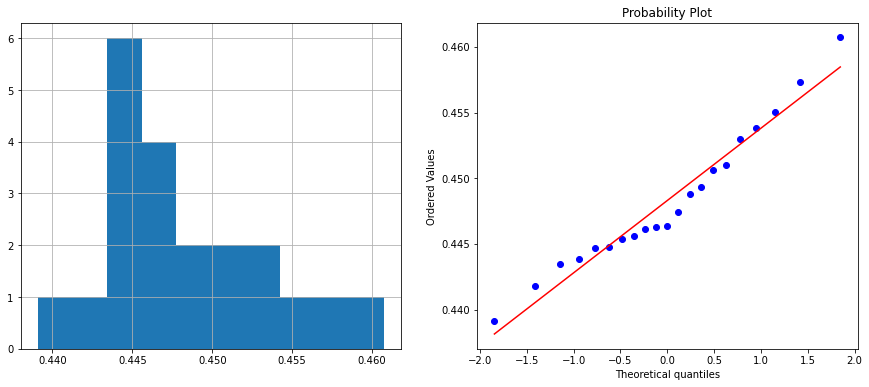

In [26]:
df['DeliveryTime']=1/(df['DeliveryTime']+1)
diagnostic_plots(df,'DeliveryTime')

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

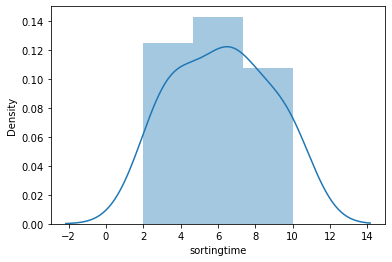

In [27]:
sns.distplot(df['sortingtime'])

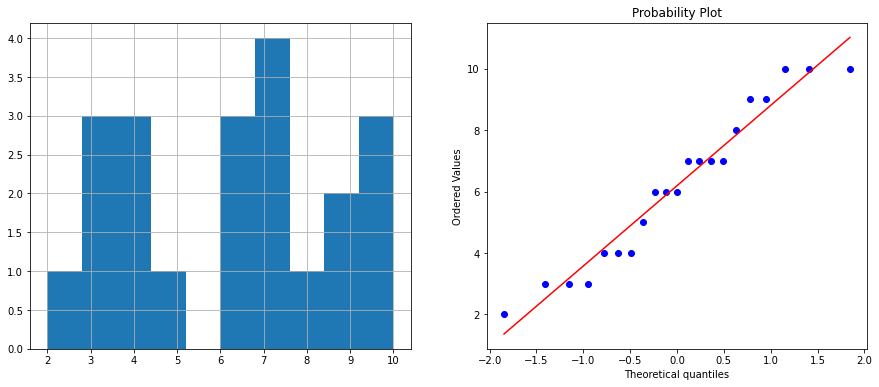

In [28]:
diagnostic_plots(df, 'sortingtime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

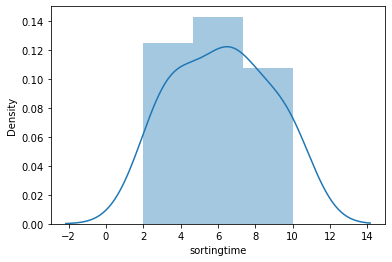

In [29]:
sns.distplot(df['sortingtime'])

In [30]:
#transforming data into expo


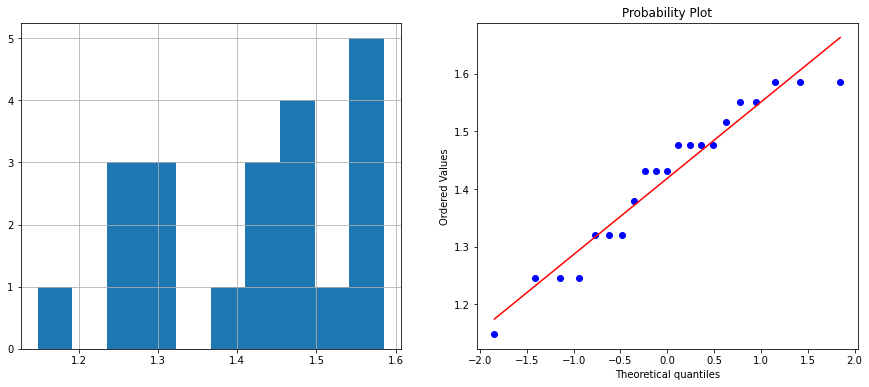

In [31]:
df['sortingtime']=df['sortingtime']**(1/5)
diagnostic_plots(df,'sortingtime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

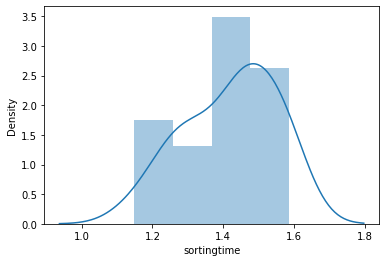

In [32]:
sns.distplot(df['sortingtime'])

In [33]:
#resiprocal trqnsformation 

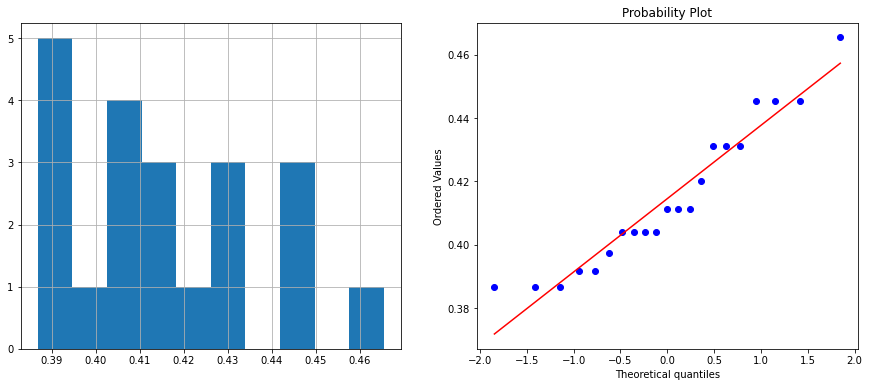

In [34]:
df['sortingtime']=1/(df['sortingtime']+1)
diagnostic_plots(df,'sortingtime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

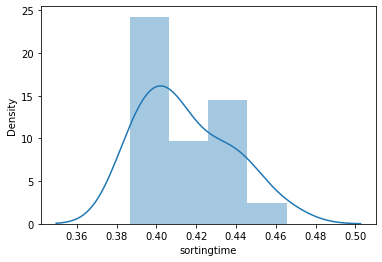

In [35]:
sns.distplot(df['sortingtime'])

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

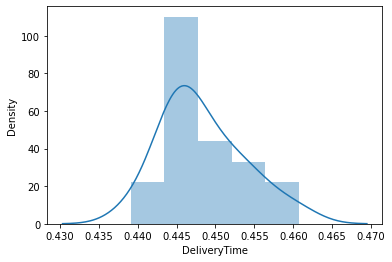

In [36]:
sns.distplot(df['DeliveryTime'])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,:])


In [38]:
print(df1)

[[-0.86012361 -1.24730596]
 [ 0.51086288  0.74374319]
 [-0.67956709 -0.14544138]
 [-1.2428297  -1.0219408 ]
 [-1.76256866 -1.24730596]
 [ 0.09476153 -0.14544138]
 [-0.56410122 -0.48030725]
 [ 1.73139232  1.38084795]
 [-0.38381354 -1.24730596]
 [-0.52431561 -1.0219408 ]
 [-0.69155346 -0.76878753]
 [ 1.2876946   0.74374319]
 [-0.16654157 -0.48030725]
 [ 1.05232162  1.38084795]
 [ 0.89762855  1.38084795]
 [ 0.19413188  0.74374319]
 [ 0.45047676 -0.14544138]
 [-0.419306   -0.48030725]
 [ 2.37587672  2.28538848]
 [-0.37186445 -0.48030725]
 [-0.92856194  0.25297828]]


In [39]:
df.kurtosis()

DeliveryTime    0.142884
sortingtime    -0.499779
dtype: float64

In [40]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~sortingtime",data = df).fit()

<AxesSubplot:xlabel='sortingtime', ylabel='DeliveryTime'>

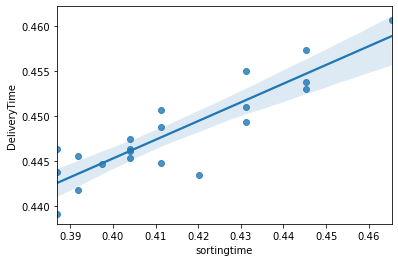

In [41]:
sns.regplot(x="sortingtime", y="DeliveryTime", data=df)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     69.11
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           9.43e-08
Time:                        19:14:10   Log-Likelihood:                 96.650
No. Observations:                  21   AIC:                            -189.3
Df Residuals:                      19   BIC:                            -187.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3620      0.010     34.821      0.000       0.340       0.384
sortingtime     0.2082      0.025      8.313      0.000       0.156       0.261
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.939
Skew:                          -0.512   Prob(JB):                        0.625
Kurtosis:                       2.836   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
(model.rsquared,model.rsquared_adj)

(0.7843549810939457, 0.773005243256785)

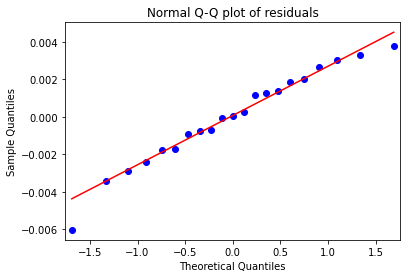

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [45]:
(model.rsquared,model.rsquared_adj)

(0.7843549810939457, 0.773005243256785)

In [46]:
print(model.tvalues, '\n', model.pvalues)    

Intercept      34.820889
sortingtime     8.313108
dtype: float64 
 Intercept      1.119324e-18
sortingtime    9.431751e-08
dtype: float64


In [47]:
#predicted new data points for sorting time

In [82]:
newdata=pd.Series([15,30,44,66,12,33,14,17])

In [83]:
newdata.head()

0    15
1    30
2    44
3    66
4    12
dtype: int64

In [84]:
newdata.tail()

3    66
4    12
5    33
6    14
7    17
dtype: int64

In [114]:
newdata1 = pd.DataFrame(newdata,columns = ['deliveryTime'])


In [116]:
newdata1

,deliveryTime
0,-0.790461
1,0.064091
2,0.861674
3,2.115018
4,-0.961372
5,0.235002
6,-0.847431
7,-0.676521


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdata = scaler.fit_transform(newdata1.iloc[:,:])


In [118]:
newdata

array([[-0.79046116],
       [ 0.06409145],
       [ 0.86167388],
       [ 2.1150177 ],
       [-0.96137168],
       [ 0.23500197],
       [-0.84743133],
       [-0.67652081]])

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliveryTime', ylabel='Density'>

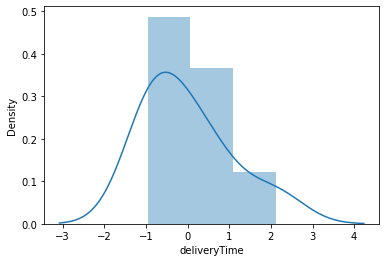

In [119]:
sns.distplot(newdata1['deliveryTime'])

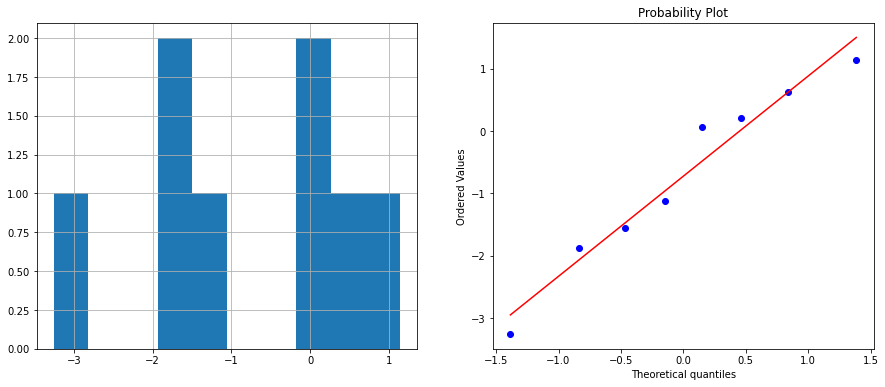

In [120]:
newdata1['deliveryTime']=np.log(newdata1['deliveryTime']+1)
diagnostic_plots(newdata1,'deliveryTime')


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliveryTime', ylabel='Density'>

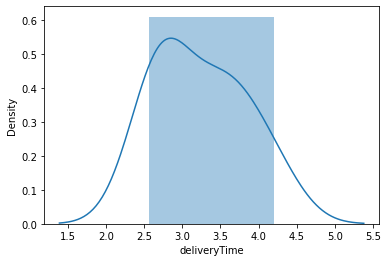

In [124]:
data_pred=pd.DataFrame(newdata,columns=['sortingtime'])

In [125]:
model.predict(data_pred)

0    0.197464
1    0.375347
2    0.541371
3    0.802266
4    0.161888
5    0.410924
6    0.185606
7    0.221182
dtype: float64

In [126]:
newdata

array([[-0.79046116],
       [ 0.06409145],
       [ 0.86167388],
       [ 2.1150177 ],
       [-0.96137168],
       [ 0.23500197],
       [-0.84743133],
       [-0.67652081]])